<h1>Fitting IVT mechanistic model to new data<h1>

In [2]:
include("../modules/IVTmodel.jl")

plotMg2PPiphasediagram (generic function with 1 method)

In [1]:
using Pkg
Pkg.activate("../IVTmodel")
Pkg.instantiate()
include("../modules/IVTmodel.jl")
#Generates settings for parameters used
fittingmodel = setupmodel_IVT4()
#Imports calibration data from csv files
modeldata = importakamadata()
osumidata = importosumidata()
#Imports PPiase validation data
PPiasedata = importakamaPPiasedata();
akamafittedparametersmatrix = Matrix(CSV.read("../outputs/fittedparameters.csv", DataFrame,header=false))
fittedparamslist = reshape(akamafittedparametersmatrix,(size(akamafittedparametersmatrix)[1],))
covariancemat = Matrix(CSV.read("../outputs/covariancematrix.csv", DataFrame,header=false))
fittedparams = fullparameterset(fittingmodel,fittedparamslist)
printresidual(fittingmodel,modeldata,osumidata,fittedparamslist)

  Activating project at `C:\Users\ChemeGrad2021\Documents\Braatz Group\MRNA Synthesis\Published code\IVT2.0\IVTmodel`
Precompiling project...
  ? Metrics
Precompiling Metrics
        Info Given Metrics was explicitly requested, output will be shown live 
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
  ? Metrics
[ Info: Precompiling Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78]
ERROR: Method overwriting is not permitted during Module precompilation. Use `__precompile__(false)` to opt-out of precompilation.
[ Info: Skipping precompilation since __precompile__(false). Importing Metrics [cb9f3049-315b-4f05-b90c-a8adaec4da78].
┌ Warning: Replacing docs for `Metrics.bin_to_cat :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metrics.confusion_matrix :: Tuple{Any, Any}` in module `Metrics`
└ @ Base.Docs docs\Docs.jl:243
┌ Warning: Replacing docs for `Metri

Model has 25 fitted parameters, 17 of which have a bayesian prior
Total Residual:                        1007.3
Components of residual:
Concentration Trajectories (Figure 2): 418.6
Initial Reaction Rate (Figure 3A):     135.2
Mg2PPi solubility (Figure 3B):         216.4
Parameter priors:                      159.5
pH Effect Data:                        77.6


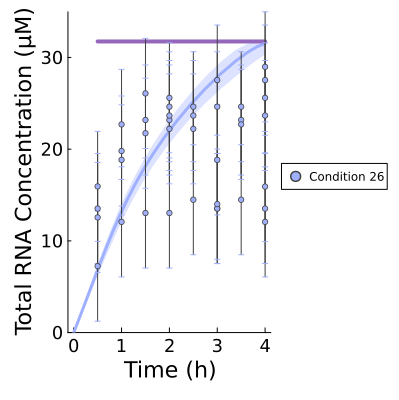

In [3]:
filename = "../data/arranta/round1data/arrantaEGFP.csv"
arrantaplot1 = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, maximumyield = true, range = [26],dataerrorbars = true, multiplot = true, OAccounterion = false)

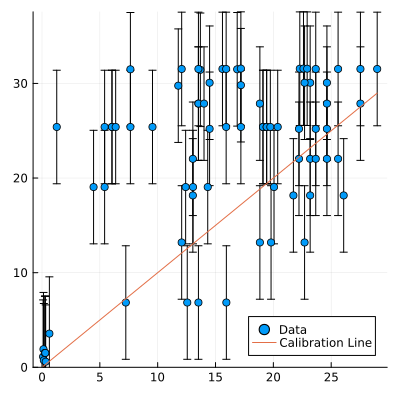

In [4]:
arrantaplot1 = plotcalibrationfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, range = 1:40, OAccounterion = false)

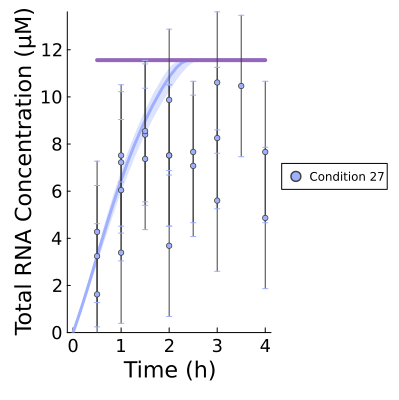

In [5]:
filename = "../data/arranta/round1data/arrantaFluc.csv"
arrantaplot1 = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, maximumyield = true, range = [27],dataerrorbars = true, multiplot = true, OAccounterion = false)

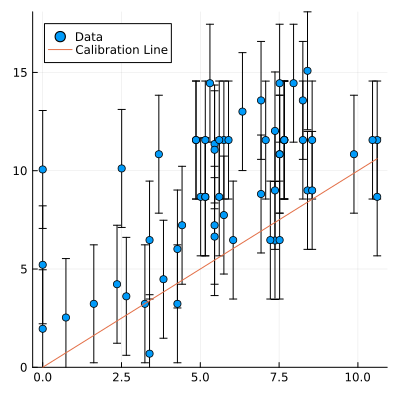

In [6]:
arrantaplot1 = plotcalibrationfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, range = 1:27, OAccounterion = false)

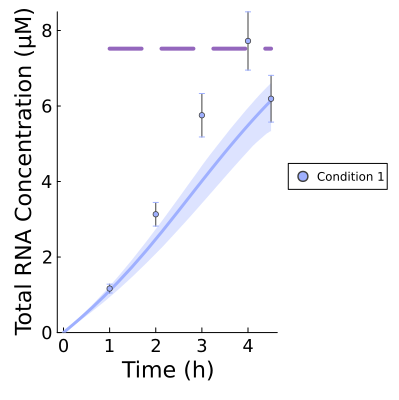

In [7]:
filename = "../data/arranta/PPiasestudyround1/arrantaCOVIDFitting.csv"
arrantaplot1 = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, maximumyield = true, range = [1],dataerrorbars = true, multiplot = true, OAccounterion = false)

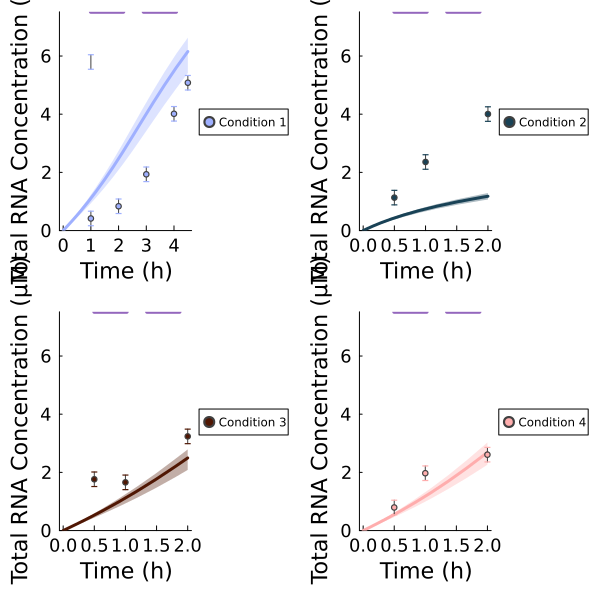

In [8]:
filename = "../data/arranta/PPiasestudyround1/arrantaCOVIDInitial.csv"
arrantaplot1 = plotfromcsv(fittingmodel,fittedparamslist,covariancemat,filename, maximumyield = true, range = [1,2,3,4], plotsize = (600,600), dataerrorbars = true, multiplot = true, OAccounterion = false, precip = false)

In [15]:
COVIDparams = fittedparamslist;

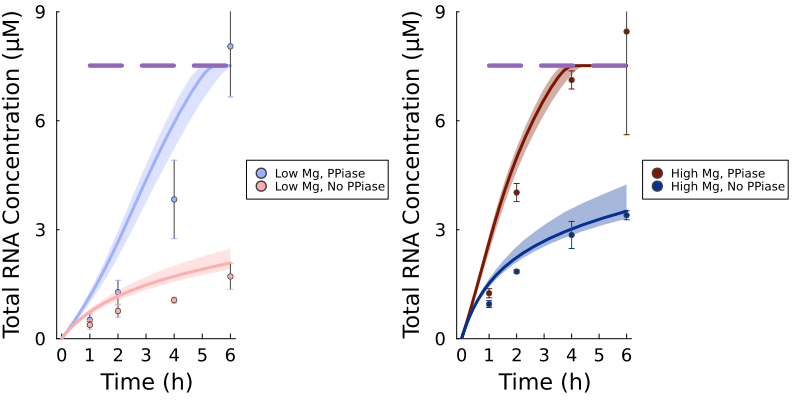

In [16]:
filename = "../data/arranta/PPiasestudyround2/arrantaCOVID_PPiase.csv"
arrantaplotlowMg = plotfromcsv(fittingmodel,COVIDparams,covariancemat,filename, maximumyield = true, labels = ["Low Mg, PPiase","Low Mg, No PPiase"], range = [2,3], plotsize = (900,600), dataerrorbars = true, multiplot = false, OAccounterion = false, precip = false)
arrantaplothighMg = plotfromcsv(fittingmodel,COVIDparams,covariancemat,filename, maximumyield = true, labels = ["High Mg, PPiase","High Mg, No PPiase"], range = [5,6], plotsize = (900,600), dataerrorbars = true, multiplot = false, OAccounterion = false, precip = false, colorscheme = :roma)
plt = plot(arrantaplotlowMg,arrantaplothighMg,ylims = (0,9), size = (800,400),bottommargin = 5mm, leftmargin = 3mm)
savefig(plt,"../figures/GM6_27/arrantaval.png")
plt

In [54]:
arrantals = [3.9984820568212043
  3.908403297602814
  5.182445308339995
  6.3364870563559275
  3.0470683026945853
 -3.580408207494102
 -5.5517918200206475
  1.1818832771539571
 -4.257829165074149
  1.5876447555465423
  1.1162132752869587
 -7.255212000951606
 -9.4236207847544
  1.0924417345209245
  0.0
  0.5283193174269077
  1.63377699099772
  4.576526496045724
  3.2583144808442857
  3.869221969838677
  1.6378381746482422
  4.987152756896689
  3.7153100989813748
 -3.9073570114042835];

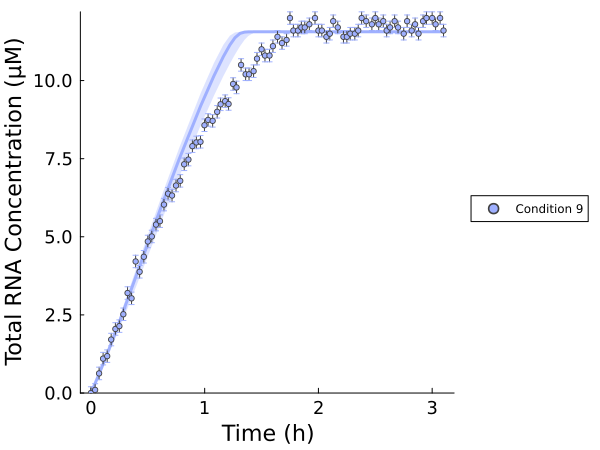

In [57]:
arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_raman_RNA.csv"
#arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_nd_pH.csv"

plt = plotfromcsv(fittingmodel,arrantals,covariancemat,arrantafilename,range = [9],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, BufferperNTP = 3.4, NaperNTP = 0.3, OAccounterion = false)
#plt = plotfromcsv(fittingmodel,arrantals,covariancemat,arrantafilename,range = [9],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, OAccounterion = false)
#plot!(ylims = (6,8))

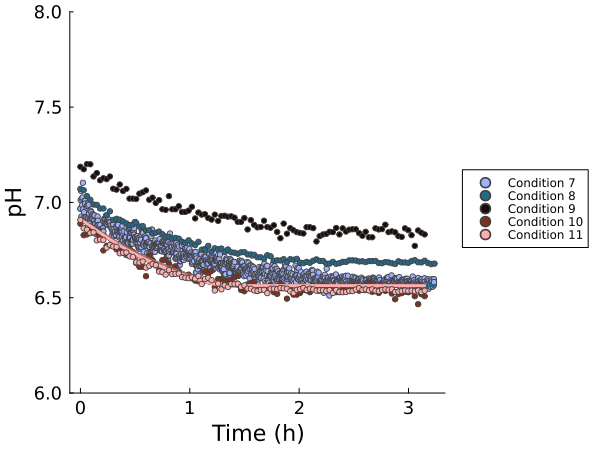

In [58]:
#arrantals = fittedparamslist
arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_nd_pH.csv"
#arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_nd_pH.csv"

plt = plotfromcsv(fittingmodel,arrantals,covariancemat,arrantafilename,range = 7:11,plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, BufferperNTP = 3.4, NaperNTP = 0.3, OAccounterion = false)
#plt = plotfromcsv(fittingmodel,arrantals,covariancemat,arrantafilename,range = 7:11,plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, OAccounterion = false)
plot!(ylims = (6,8))

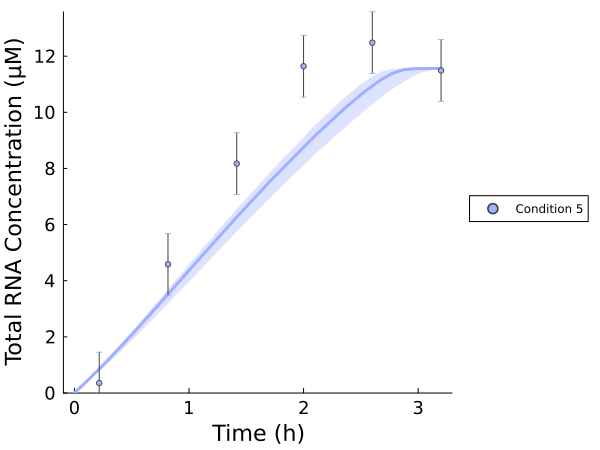

In [23]:
#arrantals = fittedparamslist
arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_nd_pH.csv"
#arrantafilename = "../data/arranta/batch_COVID_Fluc/arranta_COVID_Fluc_nd_pH.csv"

plt = plotfromcsv(fittingmodel,arrantals,covariancemat,arrantafilename,range = [5],plotsize = (600,450),dataerrorbars = true, multiplot = false,maximumyield = false, precip = true, seperateDNA = true, BufferperNTP = 3.4, NaperNTP = 0.3, OAccounterion = false)
#plot!(ylims = (6,8))